<a href="https://colab.research.google.com/github/aasem/cvision2025/blob/main/distance_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Distance Metrics

In image processing and computer vision, distance metrics help quantify similarity or dissimilarity between data points. They are used in tasks such as image retrieval, object recognition, and clustering.

We'll explore common distance metrics using images and simple feature representations.


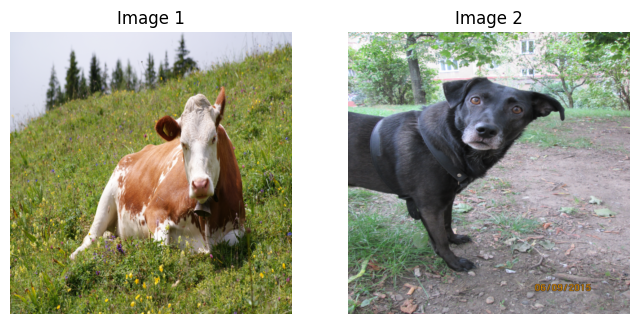

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, transform
from scipy.spatial.distance import euclidean, cityblock, cosine

# Helper function to load and resize images
def load_image(url, size=(500, 500)):
    img = io.imread(url)
    img = transform.resize(img, size, anti_aliasing=True)
    return img

# Example image URLs (you can replace these with local or other public image URLs)
img1_url = "https://upload.wikimedia.org/wikipedia/commons/8/8c/Cow_%28Fleckvieh_breed%29_Oeschinensee_Slaunger_2009-07-07.jpg"
img2_url = "https://upload.wikimedia.org/wikipedia/commons/5/53/Funny_black_lab_mix_dog%27s_look.jpg"

img1 = load_image(img1_url)
img2 = load_image(img2_url)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title("Image 1")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title("Image 2")
plt.axis('off')
plt.show()


## 🖼️ Visual Comparison

Here are two images. Let's see how *numerical distances* compare their contents. We convert both images to grayscale to simplify the comparison.

- This removes the complexity of color channels.
- Now each pixel just represents **brightness**.


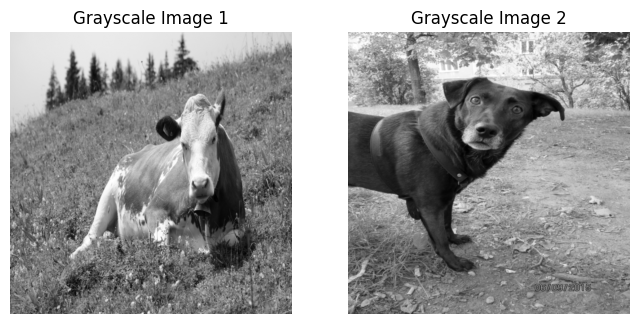

In [7]:
# Convert images to grayscale
gray1 = color.rgb2gray(img1)
gray2 = color.rgb2gray(img2)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(gray1, cmap='gray')
plt.title("Grayscale Image 1")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray2, cmap='gray')
plt.title("Grayscale Image 2")
plt.axis('off')
plt.show()


## 📐 Distance Metrics in Action

Now that both images are in grayscale and flattened to vectors:

- **Euclidean distance** tells us how far apart they are pixel-by-pixel.
- **Manhattan distance** sums the absolute differences across pixels.
- **Cosine distance** checks how *aligned* the intensity patterns are.

👉 Even though these are *completely different objects* (a cow and a dog), what do you observe about the distance values?


## 📐 Distance Metric Formulas

Let **x** and **y** be two image vectors of length *n*.

---

**1. Euclidean Distance (L2):**  
$$d_{\text{euclidean}}(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$$

- Measures straight-line distance.
- Sensitive to large pixel differences.

---

**2. Manhattan Distance (L1):**  
$$d_{\text{manhattan}}(x, y) = \sum_{i=1}^{n} |x_i - y_i|$$

- Adds absolute pixel differences.
- More robust to outliers than Euclidean.

---

**3. Cosine Distance:**  
$$d_{\text{cosine}}(x, y) = 1 - \frac{x \cdot y}{\|x\| \cdot \|y\|}$$

- Measures angle between vectors.
- Focuses on pattern similarity, not magnitude.


In [10]:
# Flatten the grayscale images into 1D vectors
vec1 = gray1.flatten()
vec2 = gray2.flatten()

# Show first 20 elements of each vector for inspection
print("🔍 Grayscale Vector 1 (first 20 values):")
print(vec1[:20])

print("\n🔍 Grayscale Vector 2 (first 20 values):")
print(vec2[:20])

print("Grayscale vector shape:", vec1.shape)

# Compute and display distance metrics
d_euclidean = euclidean(vec1, vec2)
d_manhattan = cityblock(vec1, vec2)
d_cosine = cosine(vec1, vec2)

print(f"📏 Euclidean distance: {d_euclidean:.2f}")
print(f"📏 Manhattan distance: {d_manhattan:.2f}")
print(f"📏 Cosine distance: {d_cosine:.4f}")


🔍 Grayscale Vector 1 (first 20 values):
[0.87255876 0.873544   0.87329103 0.87440226 0.8747847  0.8762523
 0.87741103 0.87744836 0.87750155 0.87839147 0.87958376 0.8810926
 0.88104219 0.88141438 0.88090499 0.88182971 0.88252987 0.88419533
 0.88454238 0.88557506]

🔍 Grayscale Vector 2 (first 20 values):
[0.70784468 0.74917349 0.72602015 0.76027131 0.79967991 0.81878915
 0.86772784 0.92698309 0.84961886 0.88260283 0.90017815 0.85880491
 0.86602199 0.80549876 0.88129954 0.92181686 0.74734698 0.71803654
 0.78867979 0.9095685 ]
Grayscale vector shape: (250000,)
📏 Euclidean distance: 143.43
📏 Manhattan distance: 57450.03
📏 Cosine distance: 0.1270
